In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
!pip install -1 sklearn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -1


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

<h5 align='right'>Two diffrents datasets, one to train the model with <br>and one to test the model with.</h5>

<h5>Opean and check the dataset</h5>
<hr color='purple'>

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')


In [6]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [28]:
dftrain.isna().value_counts()

sex    age    n_siblings_spouses  parch  fare   class  deck   embark_town  alone
False  False  False               False  False  False  False  False        False    627
dtype: int64

In [29]:
dfeval.isna().value_counts()

sex    age    n_siblings_spouses  parch  fare   class  deck   embark_town  alone
False  False  False               False  False  False  False  False        False    264
dtype: int64

In [30]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [9]:
#popping the column in a diffrent DF
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [10]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [11]:
#search by the index
dftrain.loc[0]

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [12]:
dfeval.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


<h5>Exploring the data</h5>
<hr color='purple'>

Text(0, 0.5, '% survive')

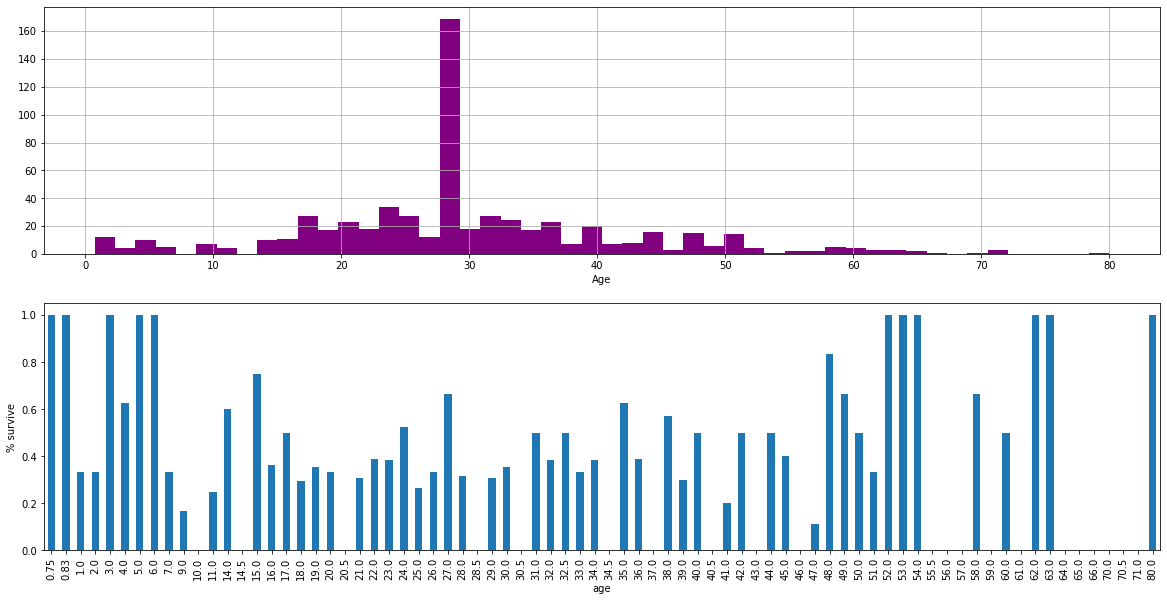

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
dftrain.age.hist(bins=50, color='purple')
plt.xlabel('Age')

plt.subplot(2,1,2)
pd.concat([dftrain, y_train],axis=1).groupby('age').survived.mean().plot(kind='bar').set_ylabel('% survive')


Text(0.5, 1.0, 'Survived')

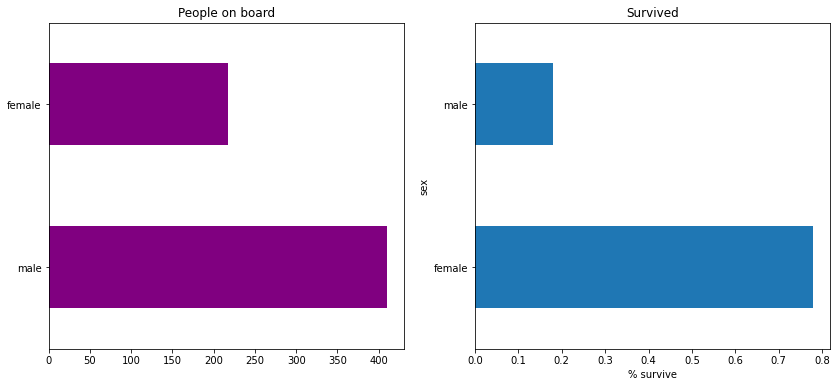

In [82]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dftrain.sex.value_counts().plot(kind='barh', color='purple')
plt.title('People on board')

plt.subplot(1,2,2)
pd.concat([dftrain, y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.title('Survived')

Text(0.5, 1.0, 'Survived')

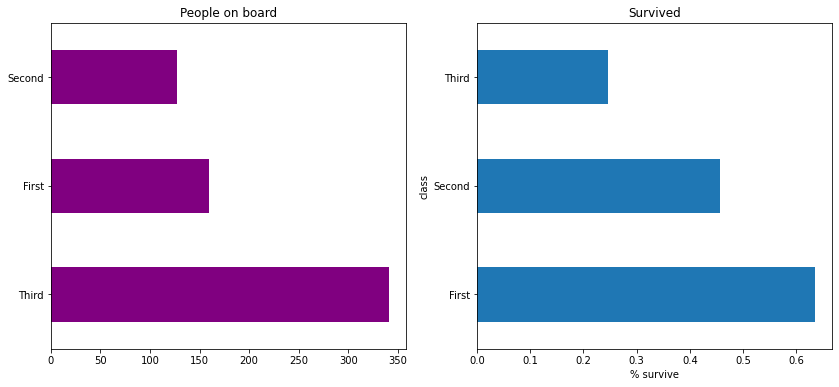

In [83]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dftrain['class'].value_counts().plot(kind='barh', color='purple')
plt.title('People on board')

plt.subplot(1,2,2)
pd.concat([dftrain, y_train],axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.title('Survived')

<h5>Machine Learning</h5>
<hr color='purple'>

In [19]:
cat_columns = ['sex', 'n_siblings_spouses', 'parch', 'class','deck', 'embark_town', 'alone']
numeric_col = ['age', 'fare']

In [20]:
feature_col = []
for feature_name in cat_columns:
  vocabulary = dftrain[feature_name].unique() #get a list of all unique values from given feature column
  feature_col.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

In [21]:
for feature_name in numeric_col:
  feature_col.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [22]:
feature_col

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [25]:
#these are all the different unique values that we had in that specific feature name
dftrain['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [66]:
#epochs is the number of times the model will see the same data
def make_input_fn(data_df, label_df, num_epochs=300, shuffle=True, batch_size=30):
  def input_function():
    ds=tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds=ds.shuffle(1000)
    ds=ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_col)

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn) #get model metric/stats by testing on testing data

clear_output()
print(result['accuracy'])
print(result)


0.7878788
{'accuracy': 0.7878788, 'accuracy_baseline': 0.625, 'auc': 0.83431286, 'auc_precision_recall': 0.77758527, 'average_loss': 0.46863475, 'label/mean': 0.375, 'loss': 0.46912467, 'precision': 0.7171717, 'prediction/mean': 0.37879127, 'recall': 0.7171717, 'global_step': 6300}


<h5 align='right'>To determine the accuracy is essentially comparing the results that the predictions <br>gave from our model verus what the actual results were,<br> for every signle one of those passengers. <br>That's how its came up with an accuracy of 78%,<br> and these number will change with the num_epochs selected</h5>

In [71]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
print('the datas of person selected: \n', dfeval.loc[4])
print('\nthese person survived? 0:No and 1: Yes \n', y_eval.loc[4])
print('\nthe probability for survive in the model were:  ', result[4]['probabilities'][1]) #1 means survived

the datas of person selected: 
 sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object

these person survived? 0:No and 1: Yes 
 1

the probability for survive in the model were:   0.21007872


<h5 align='right'>This case shows how the model can fail, <br>in this case the chances of survival were 23% <br>but these people actually survived.</h5>